# Extracting CMA (Census Metropolitan Area) Boundaries


#### Process

- Load Canadian Census Geometries
- Extract boundaries for each city
- Extraxt DAs for each CMA
- Save Data

https://www.statcan.gc.ca/eng/subjects/standard/daily/5000076

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Leonardo/Documents/MetroWork/RealEstateData')

In [2]:
canada = gpd.read_file('CensusData2016/Geographies/lda_000b16a_e.shp')

### Logic for study areas
All canadian metropolitan areas greater than 1 million people
https://en.wikipedia.org/wiki/Template:Largest_metropolitan_areas_of_Canada

In [3]:
#function for extracting metropolitan census blocks
def get_metrocensus(canada=canada, MAID=[], MANAMES=[], PROVFILTER=[]): 
    '''filters canadian census layer by metropolitan area, The result is census blocks for a given metropolitan area'''
    #filter by metropolitan area
    if MAID != []:
        MAREA = canada[canada.CMAPUID.isin(MAID)]
        return MAREA
    elif MAID == []:
        MAREA = canada[canada.CDNAME.isin(MANAMES) & ~canada.PRUID.isin(PROVFILTER)]
        return MAREA

In [94]:
#function for extracting metropolitan boundaries
def get_metrobounds(canada=canada, MAID=[], MANAMES=[], PROVFILTER=[]): 
    '''filters canadian census layer by metropolitan area, and dissolves all polygons. The result is metropolitan boundaries'''
    #create new col to be used with dissolve
    canada['COUNTRY'] = 1
    if MAID != []:
        MAREA = canada[canada.CMAPUID.isin(MAID)]
        MAREA = MAREA.dissolve(by='COUNTRY')
        MAREA = MAREA[['CMANAME', 'geometry']]
        return MAREA
    elif MAID == []:
        MAREA = canada[canada.CDNAME.isin(MANAMES) & ~canada.PRUID.isin(PROVFILTER)]
        MAREA = MAREA.dissolve(by='COUNTRY')
        MAREA = MAREA[['CMANAME', 'geometry']]
        return MAREA   

In [4]:
## BLOCKS
#get metro toronto
MTBLOCKS = get_metrocensus(canada=canada, MANAMES=['Toronto', 'Hamilton', 'Durham', 'Halton', 'Peel', 'York'], PROVFILTER=['13'])
MTBLOCKS = MTBLOCKS.to_crs({'init' :'epsg:4326'})
# MTBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MTBLOCKS.shp')
#get metro vancouver
MVBLOCKS = get_metrocensus(canada=canada, MAID=['59933'])
MVBLOCKS = MVBLOCKS.to_crs({'init' :'epsg:4326'})
# MVBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MVBLOCKS.shp')
##statscan says that metro toronto is this: "CMAPUID" IN ('35535') but it doesnt make sense.. investigate!
#get metro montreal
MMBLOCKS = get_metrocensus(canada=canada, MAID=['24462'])
MMBLOCKS = MMBLOCKS.to_crs({'init' :'epsg:4326'})
# MMBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MMBLOCKS.shp')
#get Ottawa-Gattineau
MOBLOCKS = get_metrocensus(canada=canada, MAID=['35505', '24505'])
MOBLOCKS = MOBLOCKS.to_crs({'init' :'epsg:4326'})
# MOBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MOBLOCKS.shp')
#get metro calgary
MCBLOCKS = get_metrocensus(canada=canada, MAID=['48825'])
MCBLOCKS = MCBLOCKS.to_crs({'init' :'epsg:4326'})
# MCBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MCBLOCKS.shp')
#get metro edmonton
MEBLOCKS = get_metrocensus(canada=canada, MAID=['48835'])
MEBLOCKS = MEBLOCKS.to_crs({'init' :'epsg:4326'})
# MEBLOCKS.to_file('CensusData2016_MA/CensusBlocks/MEBLOCKS.shp')

In [98]:
# BOUNDARIES
#get metro toronto
MTAREA = get_metrobounds(canada=canada, MANAMES=['Toronto', 'Hamilton', 'Durham', 'Halton', 'Peel', 'York'], PROVFILTER=['13'])
MTAREA = MTAREA.to_crs({'init' :'epsg:4326'})
MTAREA.to_file('Boundaries/MTAREA.shp')
#get metro vancouver
MVAREA = get_metrobounds(canada=canada, MAID=['59933'])
MVAREA = MVAREA.to_crs({'init' :'epsg:4326'})
MVAREA.to_file('Boundaries/MVAREA.shp')
#get metro montreal
MMAREA = get_metrobounds(canada=canada, MAID=['24462'])
MMAREA = MMAREA.to_crs({'init' :'epsg:4326'})
MMAREA.to_file('Boundaries/MMAREA.shp')
#get Ottawa-Gattineau
MOAREA = get_metrobounds(canada=canada, MAID=['35505', '24505'])
MOAREA = MOAREA.to_crs({'init' :'epsg:4326'})
MOAREA.to_file('Boundaries/MOAREA.shp')
#get metro calgary
MCAREA = get_metrobounds(canada=canada, MAID=['48825'])
MCAREA = MCAREA.to_crs({'init' :'epsg:4326'})
MCAREA.to_file('Boundaries/MCAREA.shp')
#get metro edmonton
MEAREA = get_metrobounds(canada=canada, MAID=['48835'])
MEAREA = MEAREA.to_crs({'init' :'epsg:4326'})
MEAREA.to_file('Boundaries/MEAREA.shp')

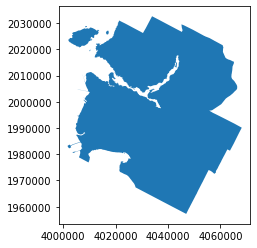

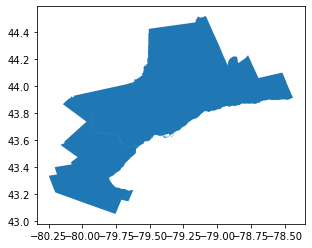

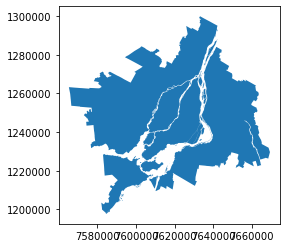

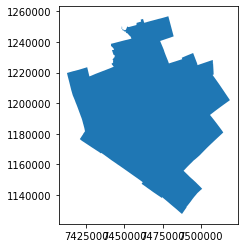

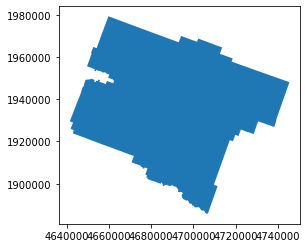

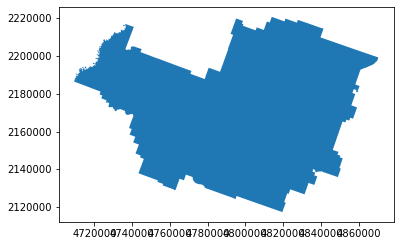

In [97]:
MVAREA.plot()
MTAREA.plot()
MMAREA.plot()
MOAREA.plot()
MCAREA.plot()
MEAREA.plot()
plt.show()